# Fashion Image Classification using Fashion MNIST

- Import Libraries
- Load the dataset from keras
- preprocessing
- Exploratory Data Analysis
- validation split
- Instantiate and Build model
- Complie the Model
- Fit Model
- Evaluate model
- make predictions
- Confusion Matrix
- Final Script

## Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from keras.models import Sequential
from keras.datasets import fashion_mnist

## Load the dataset from keras


In [ ]:
# Load the dataset from keras
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


print(f"X_train: {X_train_full.shape}")
print(f"y_train: {y_train_full.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

## Preprocessing

In [ ]:
# Split into Validation sets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Scale between 0 and 1
X_valid = X_valid / 255
X_train = X_train / 255


print(f"X_valid: {X_valid.shape}")
print(f"y_valid: {y_valid.shape}")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

## Exploratory Data Analysis

In [ ]:
# list of class names in the datasets
class_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

# An Example of first training label
first_item = class_names[y_train[0]]
print(f"The equivalent item name for class label: '{y_train[0]} is '{first_item}'")
print(f"The total number of class labels are: {len(class_names)}")


## Instantiate and Build model

In [ ]:
# Instantiate Model
mode = Sequential()

# Add Layers to the model
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation= "softmax"))

In [ ]:
# model summary
model.summary()

## Compiling the Model

In [ ]:
# Compiling the model
mode.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

## Training the Model

In [ ]:
# Fitting the Model to the train and Validation datasets

history = model.fit(
    X_train,
        y_train,
        epochs= 30,
        validation_data= (X_valid, y_valid)
)
        

In [ ]:
# Save the Model
model.save("fashion_mnist_model_2.h5")

# # # load saved Model
# model = keras.models.load_model("fashion_mnist_model_2.h5")

In [ ]:
# Learning Curve 

pd.DataFrame(history.history).plot(
    title = "Learning Curve",
    xlabel = "epochs", 
    ylabel = "Accuracy and Loss"
);

## Evaluate model

In [ ]:
# Evaluate model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

## Make Prediction

In [ ]:
# Make Prediction in One-Hot Encoding
y_pred = model.predict(X_test[:3])

# Convert Prediction to class labels
y_pred_label = np.argmax(y_pred, axis = 1)

# Obtaining class name for predicted labels
class_ = np.array(class_names)[y_pred_label]

# Show three Samples
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap = "gray")
    plt.title(f"pred: {np.array(class_names)[y_pred_label[i]]}")
    plt.axis("off")

plt.show()

## Confusion Matrix

In [ ]:
# Prediction
prediction = np.argmax(model.predict(X_test), axis= 1)

# Confusion Matrix
cm = confusion_matrix(y_test, prediction)

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_names[9]

# Final Script

In [48]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from keras.models import Sequential
from keras.datasets import fashion_mnist

class_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]


class FashionImageClassifier():
    def __init__(self, dataset = fashion_mnist):
        self.dataset = dataset

    # load dataset
    def load_keras_data(self):
        """
        method to load dataset from keras.datasets
        parameters: None
        ----------
        returns: X_train_full, y_train_full, X_test, y_test
        -------
        Example: X_train, y_train, X_test, y_test = load_keras_data()
        -------
        """
        
        # Load the dataset from keras
        (X_train_full, y_train_full), (X_test, y_test) = self.dataset.load_data()
    
        # Return the train-test splits
        return X_train_full, y_train_full, X_test, y_test
        
    
    def preprocess(self, X_train, y_train, split = 0.2, scale_value = 255):
        """
        method to preprocess the loaded dataset. By spliting the train data into validation data.
        Then, scaling the feature matrix: X_train/255, X_val / 255
        
        parameters:
        ----------
            -X_train,
            -y_train,
            -split: The validation size, default: 0.2
            -scale_value: the value for scaling the feature matrix, default: 255
            
        returns: X_train, y_train, X_valid, y_valid
        -------
        Example: X_train, y_train, X_valid, y_valid = preprocess(X_train, y_train, split = 0.1)
        -------
        """
        
        # Adjust Split
        split = round(split * len(X_train))
        
        # Split into Validation sets
        X_valid, X_train = X_train[:split], X_train[split:]
        y_valid, y_train = y_train[:split], y_train[split:]
        
        # Scale between 0 and 1
        X_valid = X_valid / scale_value
        X_train = X_train / scale_value
    
        return X_train, y_train, X_valid, y_valid
    
    def build_model(self):
        """
        method to build the Neural Network. all parameters are defined. 
        The model contains 2 Hidden layers.
        1st layer has 300 neurons, activation = 'relu'
        2nd layer has 100 neurons, activation = 'relu'
        
        parameters: None
        ----------
        returns: model
        -------
        Example: model = build_model()
        -------
        """
        
        # Instantiate Model
        model = Sequential()
        
        # Add Layers to the model
        model.add(keras.layers.Flatten(input_shape = [28, 28]))
        model.add(keras.layers.Dense(300, activation = "relu"))
        model.add(keras.layers.Dense(100, activation = "relu"))
        model.add(keras.layers.Dense(10, activation= "softmax"))
    
        return model
    
    def compile_model(self, model):
        """
        method to compile the Neural Network. all parameters are defined. 
        The model contains 2 Hidden layers.
               
        parameters: model
        ----------
        returns: None
        -------
        Example: compile_model(model)
        -------
        """
        
        # Compiling the model
        model.compile(
            loss = "sparse_categorical_crossentropy",
            optimizer = "sgd",
            metrics = ["accuracy"]
        )
        return "model compiled successfully"
        
    
    
    def train_model(self, X_train, y_train, X_valid, y_valid, model):
        """
        method to train the model by fitting it to the training and validation sets
        
        parameters:
        ----------
            -X_train,
            -y_train,
            -X_valid,
            -y_valid,
            -model
            
        returns: history
        -------
        Example: history = train_model(X_train, y_train, X_valid, y_valid, model)
        -------
        """
        
        # Fitting the Model to the train and Validation datasets
        history = model.fit(
            X_train,
            y_train,
            epochs= 30,
            validation_data= (X_valid, y_valid)
        )
        return history
    
    def save_model(self, model, name = "model.h5"):
        """
        method to save the trained model using keras.model.save
               
        parameters: provide the following:
        ----------
            - model,
            - name: file name to save as, default = "model.h5
            
        returns: None
        -------
        Example: save_model(model, name = "model.h5")
        -------
        """
        
        # Save the Model
        model.save(name)
        return "Model saved successfully"
    
    def load_up_model(self, name):
        """
        method to load_up the saved model using keras.models.load
               
        parameters: provide the:
        ----------
            - name: model name
            
        returns: model
        -------
        Example: new_model = load_up_model('model.h5')
        -------
        """
        
        # load saved Model
        model = keras.models.load_model(name)
    
        return model
    
    def plot_learning_curve(self, model_history):
        """
        method to plot the learning curve of the trained model. this only works directly with the model history.
               
        parameters: provide the:
        ----------
            - name: model_history
            
        returns: graph for learning curve
        -------
        Example: plot_learning_curve(history.history)
        -------
        """
        
        # Learning Curve 
        pd.DataFrame(model_history.history).plot(
            title = "Learning Curve",
            xlabel = "epochs", 
            ylabel = "Accuracy and Loss"
        )
        
    
    def evaluate_prediction(self, model, X_test, y_test):
        """
        method to evaluate the model performance on test data.
               
        parameters: provide these:
        ----------
            - model
            - X_test
            - y_test
            
        returns: loss, accuracy
        -------
        Example: loss, accuracy = evaluate_prediction(model, X_test, y_test)
        -------
        """
        
        # Evaluate model
        loss, accuracy = model.evaluate(X_test, y_test)
        return loss, accuracy
    
    def visualize_some_prediction(self, model, X_test):
        """
        method to visualize figures for three predictions
               
        parameters: provide these:
        ----------
            - model
            - X_test
            
        returns: three figures or images
        -------
        Example: visualize_some_prediction(model, X_test)
        -------
        """
        
        # Make Prediction in One-Hot Encoding
        y_pred = model.predict(X_test[:3])
        
        # Convert Prediction to class labels
        y_pred_label = np.argmax(y_pred, axis = 1)
        
        # Obtaining class name for predicted labels
        class_ = np.array(class_names)[y_pred_label]
        
        # Show three Samples
        plt.figure(figsize=(10, 3))
        for i in range(3):
            plt.subplot(1, 3, i + 1)
            plt.imshow(X_test[i].reshape(28, 28), cmap = "gray")
            plt.title(f"pred: {np.array(class_names)[y_pred_label[i]]}")
            plt.axis("off")
        
        plt.show()
    
    def display_confusion_matrix(self, model, X_test, y_test):
        """
        method to visualize the confusion matrix display of the model
               
        parameters: provide these:
        ----------
            - model
            - X_test
            - y_test
            
        returns: confusion matrix display
        -------
        Example: display_confusion_matrix(model, X_test, y_test):
        -------
        """
        
        # Prediction
        prediction = np.argmax(model.predict(X_test), axis= 1)
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, prediction)
        
        # Confusion Matrix Display
        disp = ConfusionMatrixDisplay(confusion_matrix= cm)
        disp.plot(cmap = "Blues")
        plt.title("Confusion Matrix")
        plt.show()

## Testing Final Script

In [41]:
fashion_mnist = FashionImageClassifier()

In [42]:
dir(fashion_mnist)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'build_model',
 'compile_model',
 'dataset',
 'display_confusion_matrix',
 'evaluate_prediction',
 'load_keras_data',
 'load_up_model',
 'plot_learning_curve',
 'preprocess',
 'save_model',
 'train_model',
 'visualize_some_prediction']

In [5]:
X1, y1, X2, y2 = fashion_mnist.load_keras_data()

print(f"X1: {X1.shape}")
print(f"y1: {y1.shape}")
print(f"X2: {X2.shape}")
print(f"y2: {y2.shape}")

X1: (60000, 28, 28)
y1: (60000,)
X2: (10000, 28, 28)
y2: (10000,)


In [6]:
X_train, y_train, X_val, y_val = fashion_mnist.preprocess(X1, y1, split= 0.2)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")

X_train: (48000, 28, 28)
y_train: (48000,)
X_val: (12000, 28, 28)
y_val: (12000,)


In [17]:
hhh = fashion_mnist.build_model()

type(hhh)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


keras.src.models.sequential.Sequential

In [18]:
fashion_mnist.compile_model(hhh)

'model compiled successfully'

In [25]:
history = fashion_mnist.train_model(X_train, y_train, X_val, y_val, hhh)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9170 - loss: 0.2282 - val_accuracy: 0.8896 - val_loss: 0.3052
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9190 - loss: 0.2254 - val_accuracy: 0.8942 - val_loss: 0.2955
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9221 - loss: 0.2223 - val_accuracy: 0.8872 - val_loss: 0.3096
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9199 - loss: 0.2233 - val_accuracy: 0.8878 - val_loss: 0.3077
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9201 - loss: 0.2212 - val_accuracy: 0.8903 - val_loss: 0.3008
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9232 - loss: 0.2117 - val_accuracy: 0.8780 - val_loss: 0.3619
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9259 - loss: 0.2080 - val_accuracy: 0.8903 - val_loss: 0.2983
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9267 - loss: 0.2041 - 

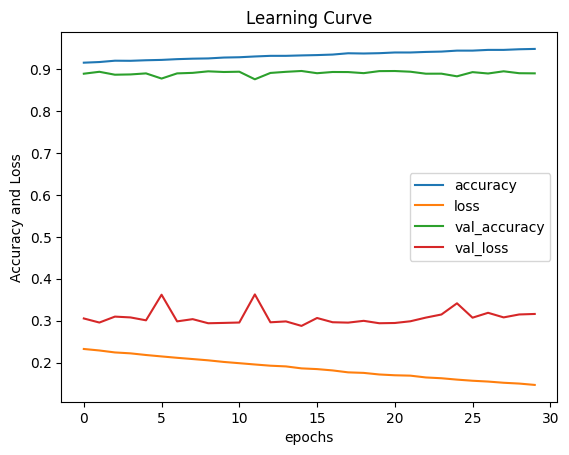

In [26]:
fashion_mnist.plot_learning_curve(history)

In [27]:
fashion_mnist.save_model(hhh, name = "xjs.h5")

'Model saved successfully'

In [28]:
kkk = fashion_mnist.load_up_model("xjs.h5")

In [29]:
kkk.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
fashion_mnist.evaluate_prediction(kkk, X2, y2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8568 - loss: 71.3770   


(73.21845245361328, 0.8540999889373779)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


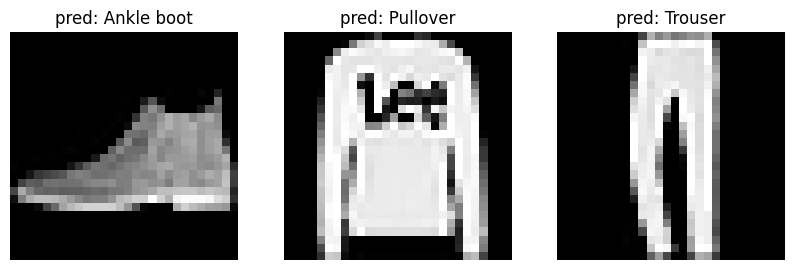

In [35]:
fashion_mnist.visualize_some_prediction(kkk, X2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


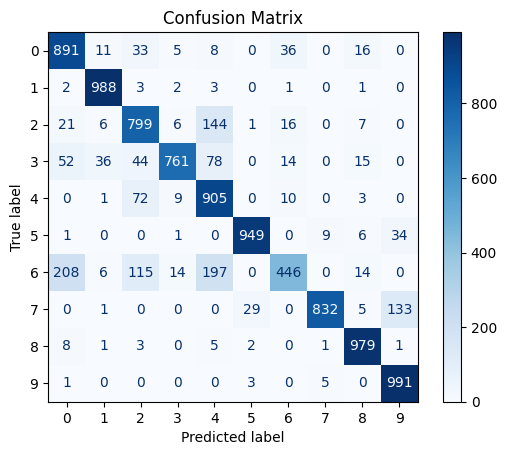

In [39]:
fashion_mnist.display_confusion_matrix(kkk, X2, y2)

# Implementing Model from External Module

In [49]:
from fashion import FashionImageClassifier

fashion_mnist = FashionImageClassifier()

In [53]:
X1, y1, X2, y2 = fashion_mnist.load_keras_data()

print(f"X1: {X1.shape}")
print(f"y1: {y1.shape}")
print(f"X2: {X2.shape}")
print(f"y2: {y2.shape}")

X1: (60000, 28, 28)
y1: (60000,)
X2: (10000, 28, 28)
y2: (10000,)


In [55]:
X_train, y_train, X_valid, y_valid = fashion_mnist.preprocess(X_train, y_train, split = 0.2)

In [57]:
new_model = fashion_mnist.load_up_model("xjs.h5")

In [58]:
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [60]:
loss, accuracy = fashion_mnist.evaluate_prediction(new_model, X2, y2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8568 - loss: 71.3770


In [61]:
loss

73.21845245361328

In [62]:
accuracy

0.8540999889373779

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


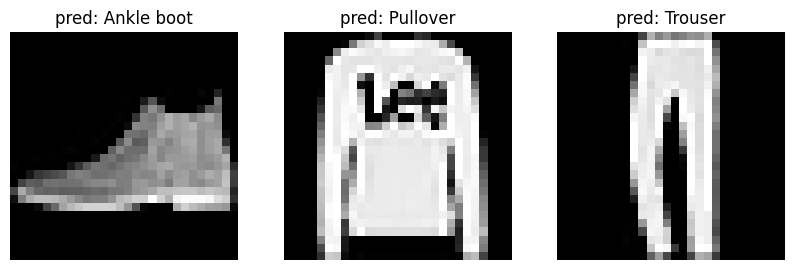

In [64]:
fashion_mnist.visualize_some_prediction(new_model, X2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   


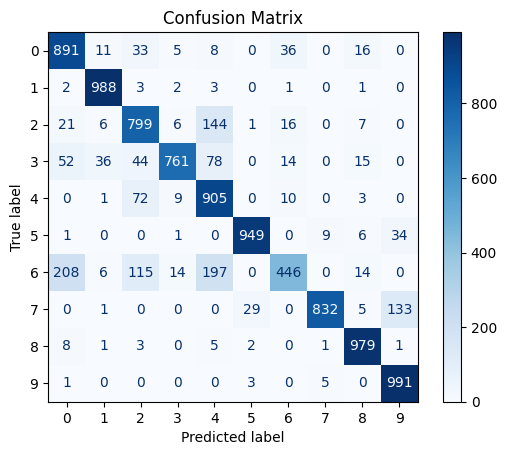

In [66]:
fashion_mnist.display_confusion_matrix(new_model, X2, y2)